(20%) Describe: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter [6] notebook that uses descriptive statistics and plots to describe the Boston House Prices [1] dataset. 

*Good summary of the dataset, repository well laid-out and organised. Reasonable commits to the repository.*

(20%) Infer: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook.

*Appropriate analysis of the relationship between the me- dian house price and whether the house borders the river, with good explanations of the analysis.*

(60%) Predict: Again using the same notebook, use keras [7] to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

*Well-trained neural network providing decent predictions of house prices based on the other variables. Good explanations of how to use the neural network and how it works.*

- Project plan in readme / github issues
- Explanation of project in readme


[1] Boston Standard Metropolitan Statistical Area. Boston house prices dataset. https://www.kaggle.com/c/boston-housing.

[2] SciPy developers. The scipy python package. https://www.scipy.org/.

[3] Python Software Foundation. Welcome to python.org. https://www.python.org/.

[4] GMIT. Quality assurance framework. https://www.gmit.ie/general/quality-assurance-framework.

[5] GitHub Guides. Mastering markdown. https://guides.github.com/features/mastering-markdown/.

[6] Project Jupyter. Project jupyter. https://jupyter.org/.

[7] Keras Team. Keras: The python deep learning library. https://keras.io/.

In [50]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 
import scipy.stats as ss
from sklearn.datasets import load_boston

In [51]:
boston_dataset = load_boston()

In [52]:
#print(boston_dataset)
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [53]:
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


In [54]:
boston_dataset.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft  
INDUS: Proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxide concentration (parts per 10 million)  
RM: Average number of rooms per dwelling  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property tax rate per $10,000  
PTRATIO: Pupil-teacher ratio by town   

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town  
LSTAT: Percentage of lower status of the population    
MEDV: Median value of owner-occupied homes in $1000s   


Target variable = MEDV (median house prices)  
Feature variables = other variables used for prediction of house price.
Main feature variable in scope = CHAS (charles river)

In [55]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/Users/joanhealy1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


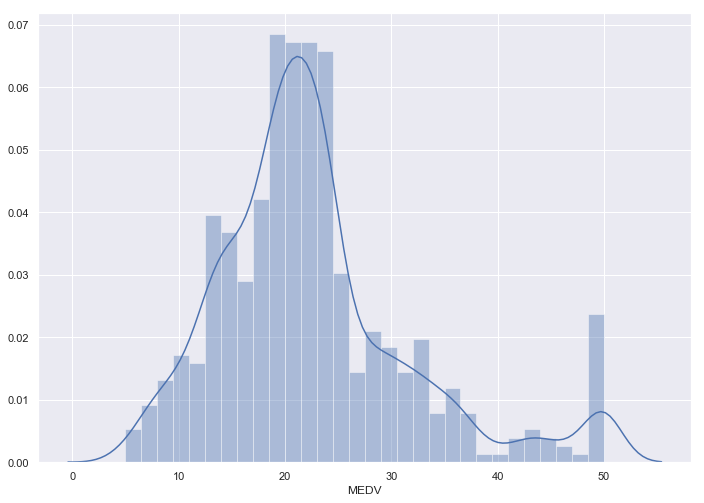

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()
# MEDV are distributed normally with few outliers.

/Users/joanhealy1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


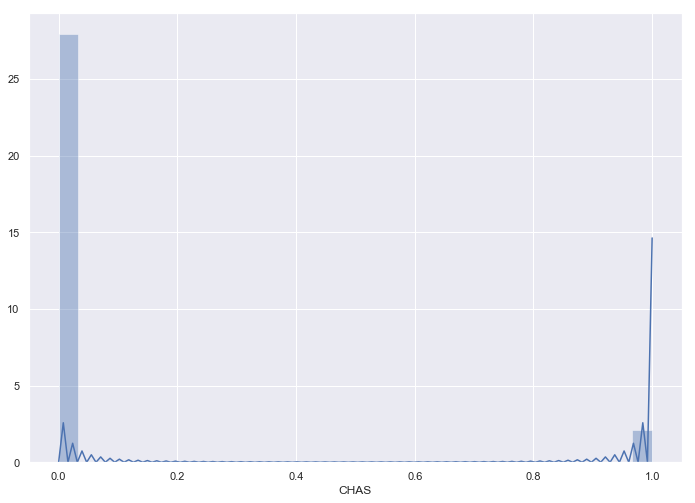

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['CHAS'], bins=30)
plt.show()

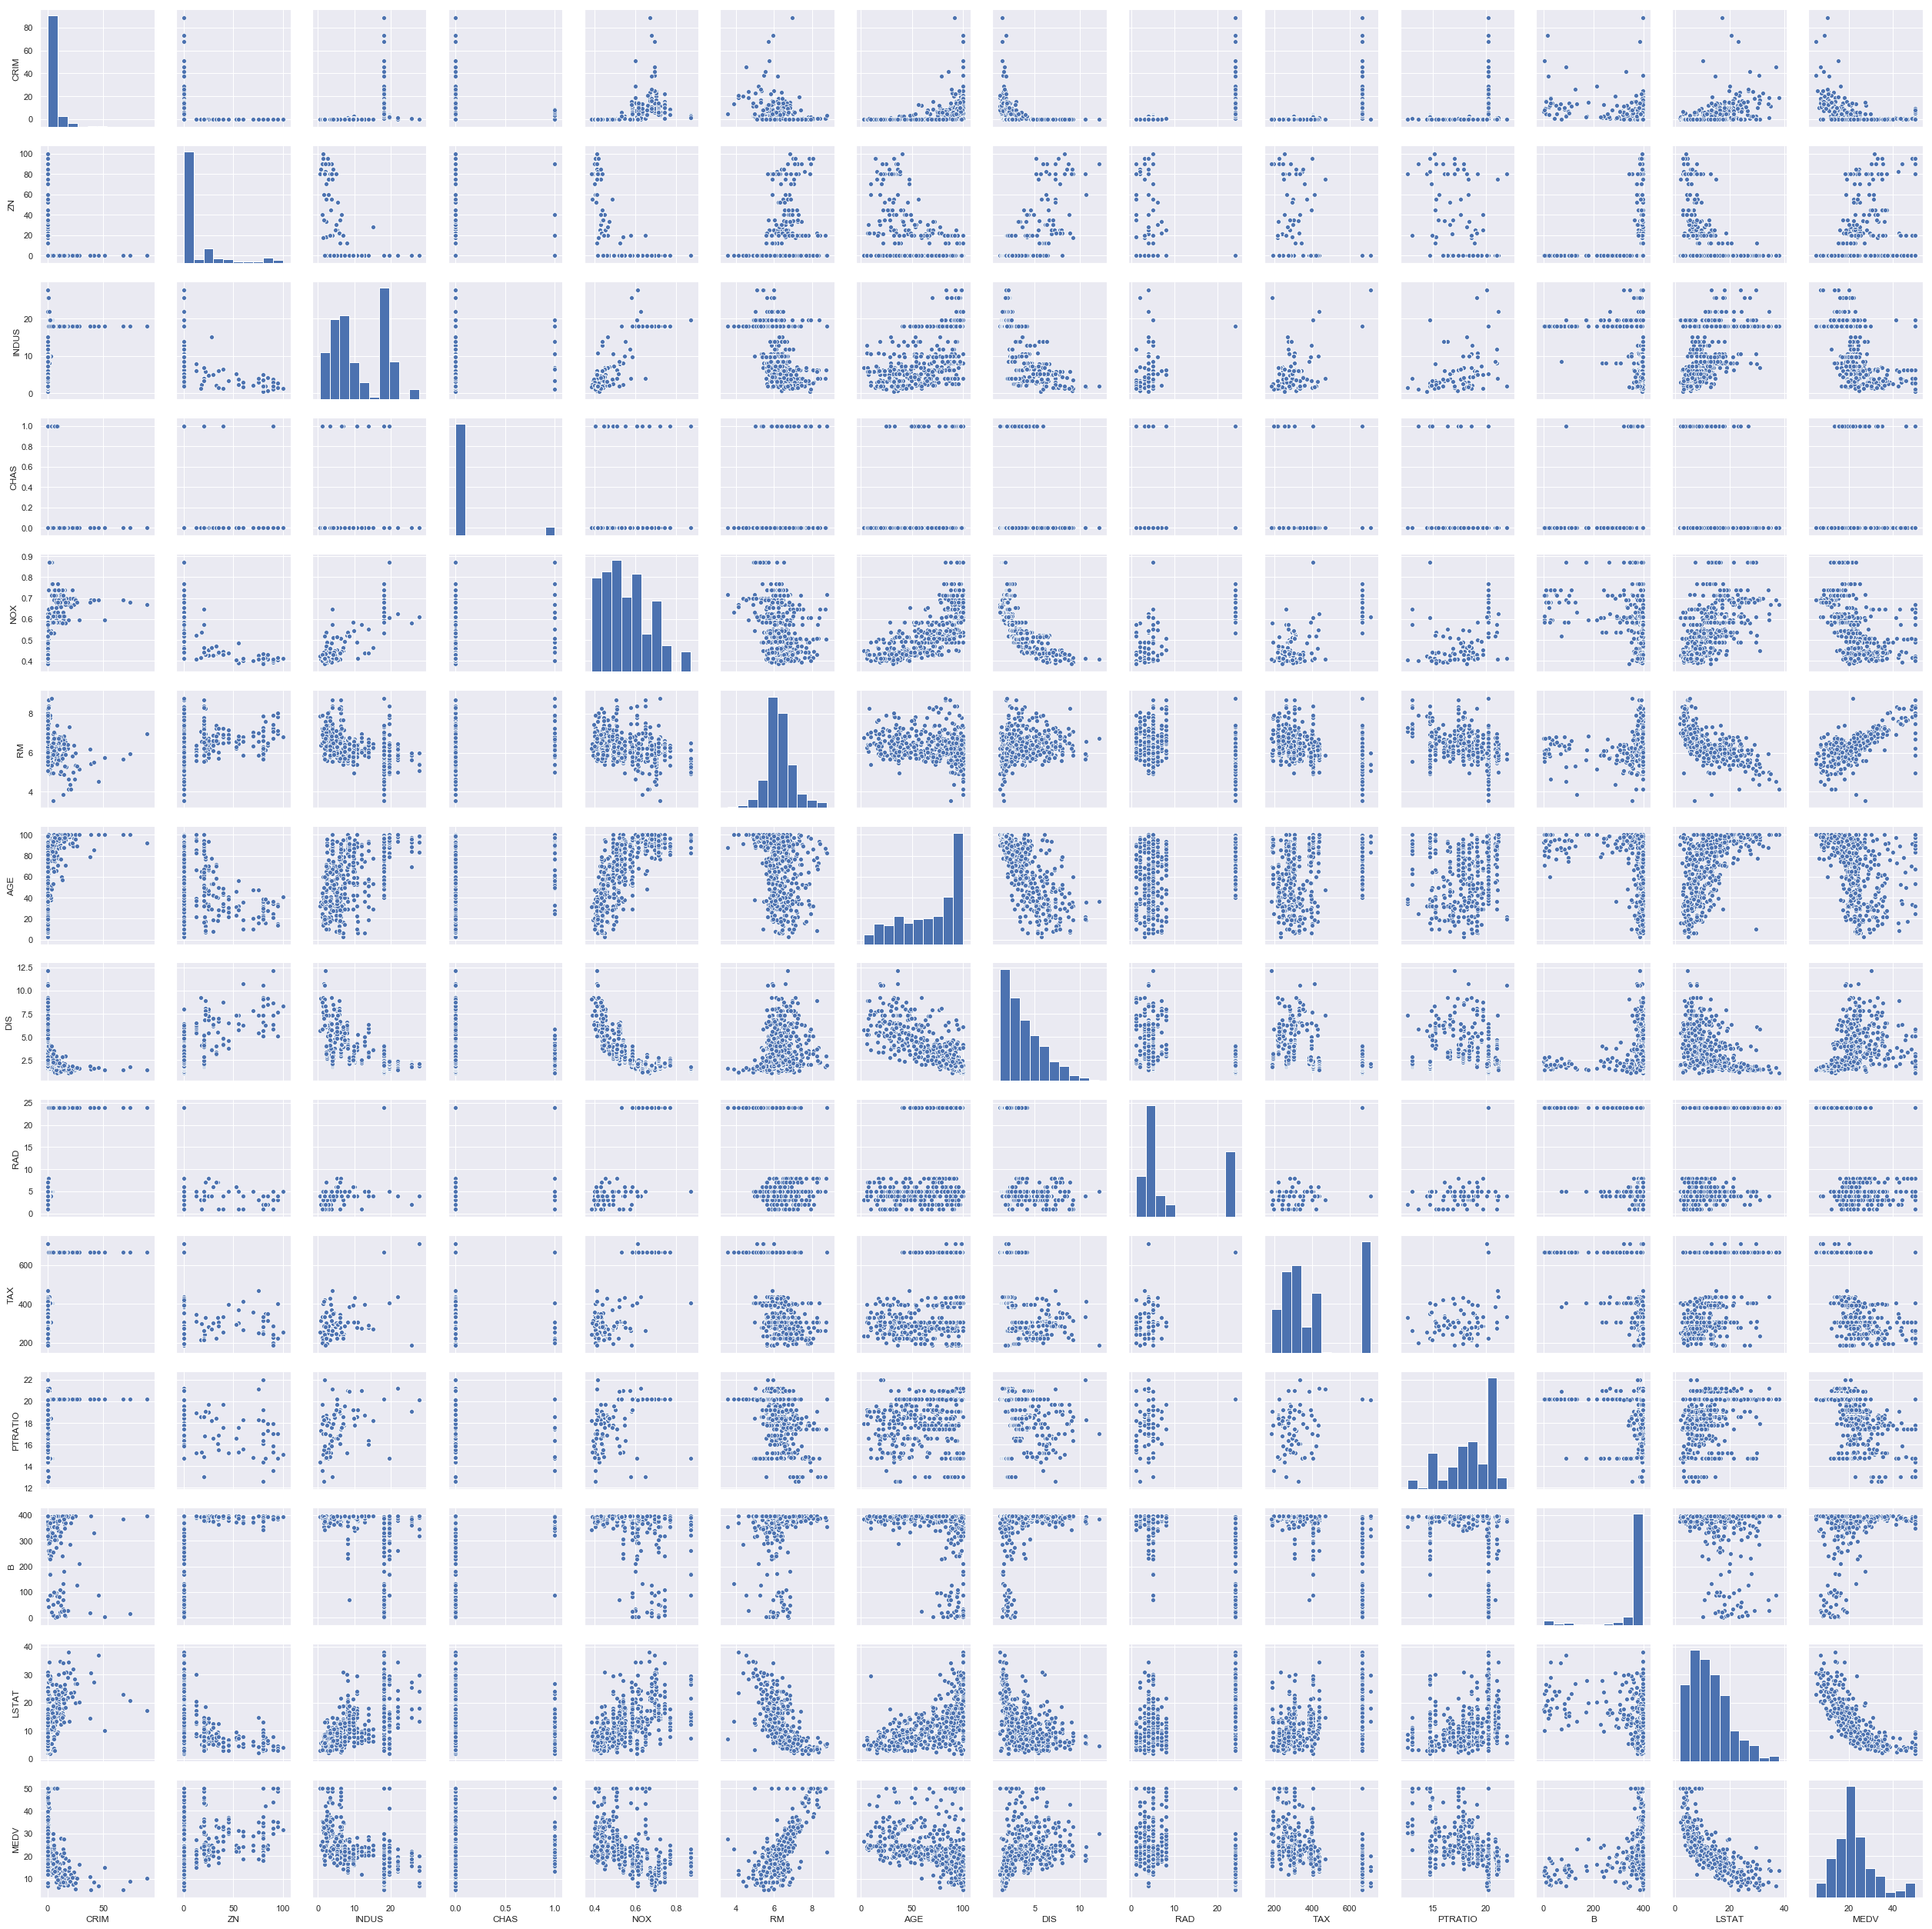

In [59]:
sns.pairplot(boston)

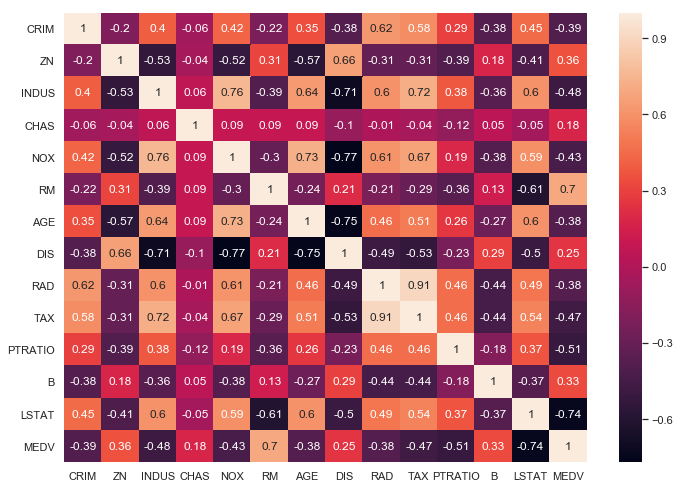

In [60]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

1 = strong positive correlation between 2 variables  
-1 = strong negative correlation between 2 variables

In [61]:
np.polyfit(boston['RM'], boston['MEDV'], 1)

array([  9.10210898, -34.67062078])

y=mx+c

The number m is the slope of the line. The slope is how much y increases by when x is increased by 1.0. The number c is the y-intercept of the line. It's the value of y when x is 0.

Cost / Sum of least squares

CHAS is binary, therefore there are only 2 x values (1 or 0). The spread of MEDV is from 0 to 50, when the house is far from the river. The spread of MEDV is mostly from 12 to 35 when the house is near the river, or so it appears. 

As the data is not linear, we will not get a linear distribution as is the case for the RM feature variable. Is there any point in getting the slope?

A boxplot might be more relevant?

In [62]:
# Calculate the best values for m and c.
w = boston['RM']
d = boston['MEDV']
# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 9.102109 and c is -34.670621.


In [63]:
np.polyfit(boston['RM'], boston['CHAS'], 1)

array([ 0.03298705, -0.13814159])

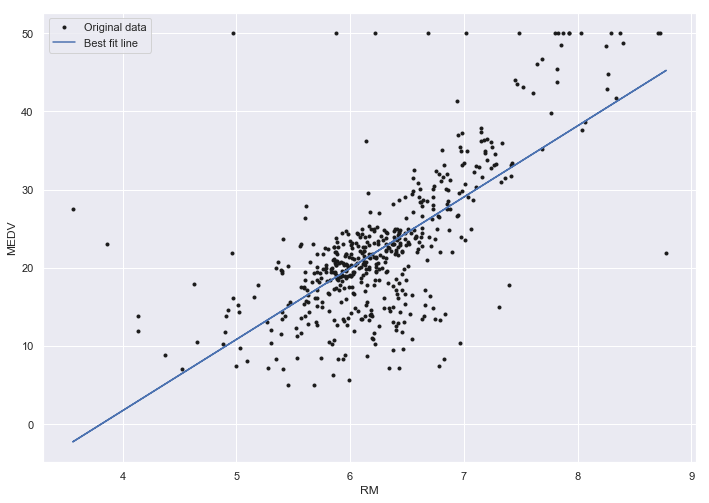

In [64]:
# Create the plot.
# plt.plot(w, d, 'k.', label='Original data')
plt.plot(boston['RM'], boston['MEDV'], 'k.', label='Original data')
plt.plot(boston['RM'], 9.10210898 * boston['RM'] + -34.67062078, 'b-', label='Best fit line')

# Set some properties for the plot.
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()

# Show the plot.
plt.show()

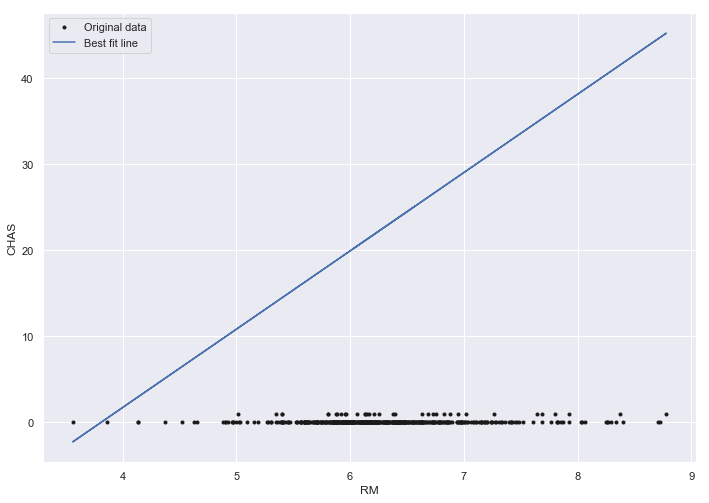

In [65]:
# Create the plot.
# plt.plot(w, d, 'k.', label='Original data')
plt.plot(boston['RM'], boston['CHAS'], 'k.', label='Original data')
plt.plot(boston['RM'], 9.10210898 * boston['RM'] + -34.67062078, 'b-', label='Best fit line')

# Set some properties for the plot.
plt.xlabel('RM')
plt.ylabel('CHAS')
plt.legend()

# Show the plot.
plt.show()

^^ no point in getting the slope, as we can see from above.

In [66]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

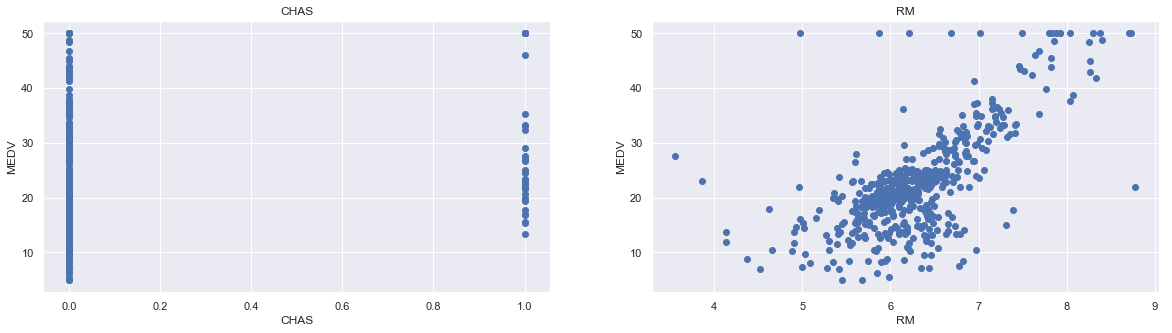

In [67]:
plt.figure(figsize=(20, 5))

features = ['CHAS', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

RM has a strong positive correlation with MEDV (0.7)   
An important point in selecting features for a linear regression model is to check for multi-co-linearity.
0.18 indicates a positive correlation of CHAS with MEDV, although it is not particularly strong.

CHAS is binary, therefore there are only 2 x values (1 or 0). The spread of MEDV is from 0 to 50, when the house is far from the river. The spread of MEDV is mostly from 12 to 35 when the house is near the river, or so it appears.

As the data is not linear, we will not get a linear distribution as is the case for the RM feature variable. Is there any point in getting the slope?

A boxplot might be more relevant?


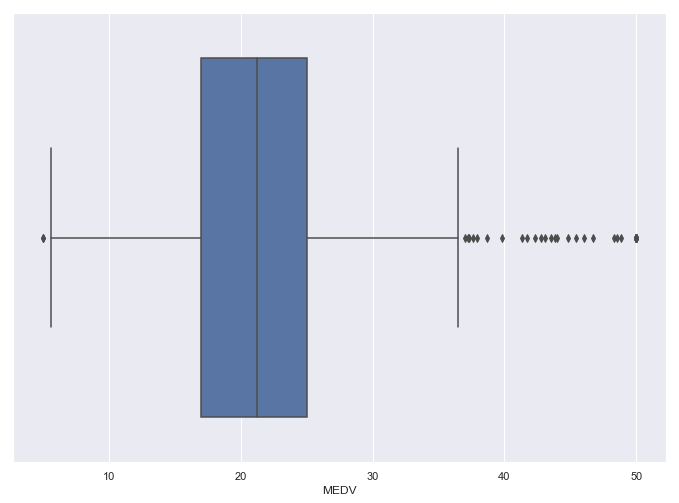

In [68]:
ax = sns.boxplot(x=boston['MEDV'])

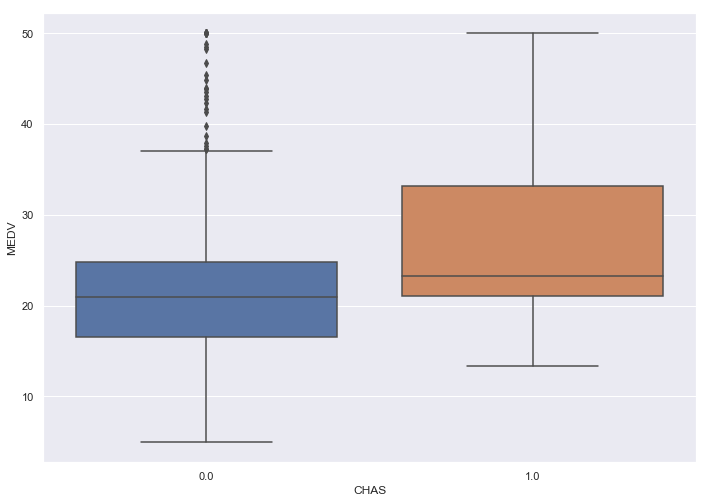

In [69]:
ax = sns.boxplot(x=boston['CHAS'], y=boston['MEDV'])

The 50th percentile of the data is almost the same in both plots (~21 and 23 respectively). However, it appears that the majority of the data for the houses near the river are in the 75th percentile. The minimum value is 14 thousand and the max value is 50 thousand. The values for these houses are significantly higher than houses away from the river, as 50% of the data are between 21 and 33 thousand. 

It appears that the houses far from the river are significantly cheaper, with 50% of the data spread between 17 and 25 thousand. The min value is 5 and the max is 37, if you don't include the outliers. There are many outliers at the high end of the spectrum however, representing houses that are very expensive, yet far from the river.

In [70]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


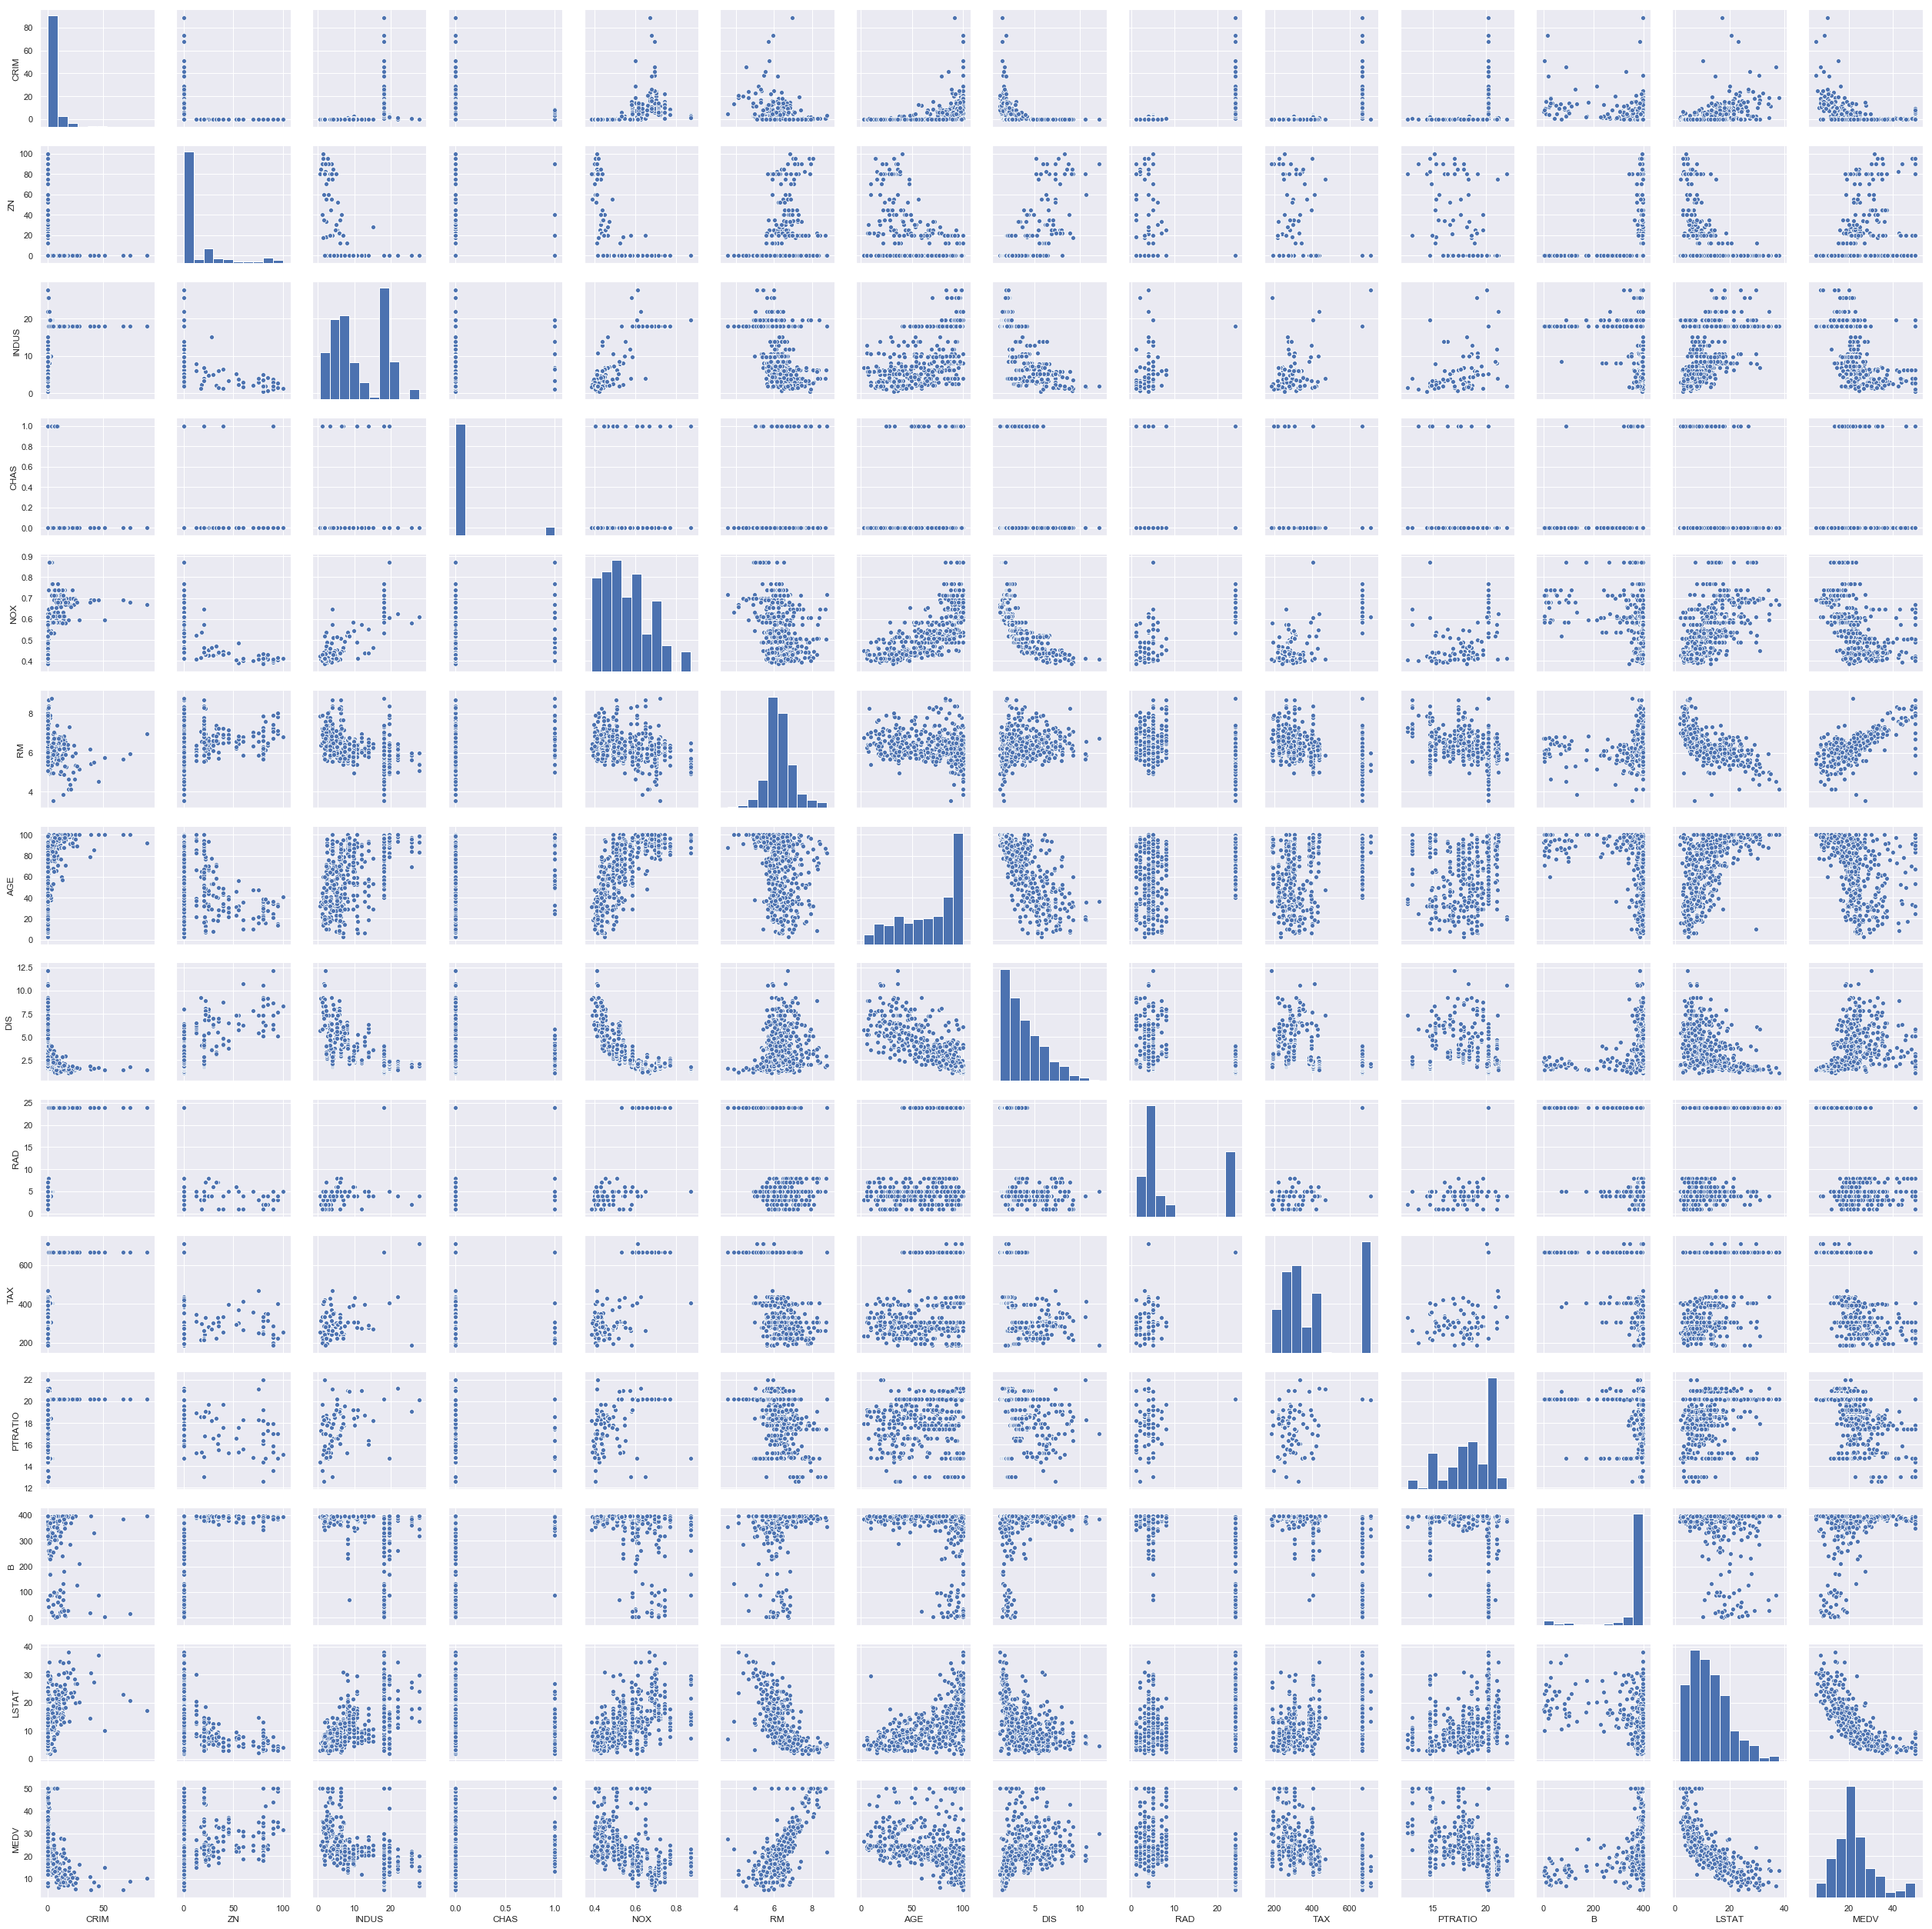

In [71]:
g = sns.pairplot(boston)

In [72]:
boston.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [73]:
# boston[boston['CHAS'] == 1]
chas = boston['CHAS']
boston.MEDV[chas == 1]
# near_river_MEDV.max()

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [74]:
boston.MEDV[chas == 0]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [76]:
ss.ttest_ind

<function scipy.stats.stats.ttest_ind>

Probability that the 2 populations have the same means is 0.739 or 74% (rounded off).

In [77]:
ss.ttest_ind(boston.MEDV[chas == 0], boston.MEDV[chas == 1])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

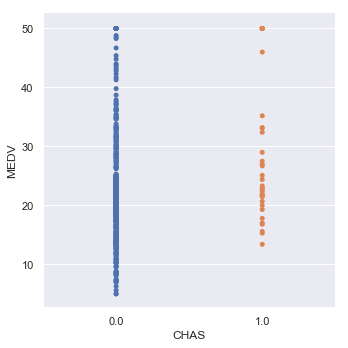

In [78]:
sns.catplot(x='CHAS', y='MEDV', jitter=False, data=boston)

References:  
https://kite.com/python/docs/sklearn.utils.Bunch  
https://stackoverflow.com/questions/48769682/how-do-i-convert-data-from-a-scikit-learn-bunch-object-to-a-pandas-dataframe/48769980  
https://www.kaggle.com/c/boston-housing/data  
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  

